# Discovering trends with bucketing
\[_In case you’re unable to see the Atoti visualizations in GitHub, try viewing the notebook in [nbviewer](https://nbviewer.org/github/atoti/atoti/blob/main/03-use-cases/01-finance/quantitative-strategy/bucket-analysis/main.ipynb)._]

Last tested version: <img src="https://img.shields.io/badge/Atoti-v0.8.4-blue">

Having to deal with large volume of data that can't be viewed in Excel can be painful.  
We can use Python to easily explore the data. Below is an example of some common libraries used in the data pipeline:
  
<img src="img/python-data-pipeline.gif" width="700px"/>  
  
The list of libraries shown is for demonstrative purpose and therefore, it is not exhaustive

Users can always use libraries such as Pandas or NumPy to perform data transformation and aggregation, and use a separate Python library to visualize the results for their analysis. Likewise, they can use machine learning on their datasets before performing their analytics. This can be a painful process as we have to learn the syntax of several libraries, maintain different iterations of results from the machine learning and compare them systematically.  

A good alternative solution is to use Atoti!  

<img src="img/atoti-data-pipeline.gif" width="700px"/>  

As the diagram above shows, Atoti can consume data directly from different data sources. It can also take in preprocessed data from Python data structures such as Pandas DataFrame or the output from our machine learning algorithm. The Atoti library comes with its visualization capabilities. Users can visualize their data in JupyterLab or create dashboard in the Atoti UI interactively. This means lesser libraries to maintain, and less programming to be done. But of course, users can still fallback on their choice of visualization tools such as Excel or Tableau and integrate them with the Atoti server.   

This notebook shows how we can quickly and easily explore the results of different trading strategies in Atoti. We will see how we break down the trends by slicing the data with different bucketing criteria.

<div style="text-align: center;" ><a href="https://www.atoti.io/?utm_source=gallery&utm_content=buckets" target="_blank" rel="noopener noreferrer"><img src="https://data.atoti.io/notebooks/banners/Discover-Atoti-now.png" alt="Try atoti"></a></div>

In [1]:
import atoti as tt
import ipywidgets as widgets
from IPython.display import SVG, Markdown

from utils import data_model

## 1. Creating Atoti model

We always start by instantiating an [Atoti session](https://docs.atoti.io/latest/lib/atoti/atoti.session.html#atoti.Session).  

While we can explore data interactively in JupyterLab with Atoti, it's great to put together dashboards that allow us to systematically analyze the data. Therefore, we configure `user_content_storage` to persist any dashboards that we create in the session.   

In addition, gain control of [memory usage](https://docs.atoti.io/latest/deployment/deployment_setup.html#java-options) of the application via the `java_options` parameter.

In [2]:
atoti_unlock = True

In [3]:
session = tt.Session(
    user_content_storage="./content", java_options=["-Xms1G", "-Xmx8G"], port=9092
)

Once we have created the session, we can proceed to create our data model and create the multi-dimensional data cube. Below shows the key steps to perform data modeling.

<img src="https://data.atoti.io/notebooks/auto-cube/img/steps_to_bi_platform.gif" width="70%" />  

We have many examples showcasing the steps to create a cube in our notebook gallery, so we put these steps into a script. Refer to [01_data_model.py](01_data_model.py) for the implementation.

In [4]:
data_model.create_model(session)

In [5]:
txn_tbl = session.tables["Transaction"]
txn_tbl.head()

AccountSuffix  TransactionPrice  \
Ticker DateTime            TransactionId                                        
MSFT   2023-01-13 10:30:00 BB_MSFT0000041822          ACCT3        235.899994   
AAPL   2023-01-03 09:30:00 BB_AAPL0000002145          ACCT1        125.459999   
       2023-01-20 10:30:00 BS_AAPL0000004593          ACCT2        135.539993   
AMZN   2023-02-07 11:30:00 BB_AMZN0000012092          ACCT5         99.470001   
BRK-B  2023-02-07 11:30:00 BS_BRK-B0000020188         ACCT3        310.733002   

                                                MAV_Strategy Action Strategy  \
Ticker DateTime            TransactionId                                       
MSFT   2023-01-13 10:30:00 BB_MSFT0000041822    MAV_close_15    Buy        B   
AAPL   2023-01-03 09:30:00 BB_AAPL0000002145    MAV_close_15    Buy        B   
       2023-01-20 10:30:00 BS_AAPL0000004593    MAV_close_30   Sell        B   
AMZN   2023-02-07 11:30:00 BB_AMZN0000012092       MAV_15_60    Buy        B   
BRK-B  2023-02-07 11:30:00 BS_BRK-B0000020188  MAV_close_120   Sell        B   

                                                      PurchaseDate  \
Ticker DateTime            TransactionId                             
MSFT   2023-01-13 10:30:00 BB_MSFT0000041822   2023-01-13 10:30:00   
AAPL   2023-01-03 09:30:00 BB_AAPL0000002145   2023-01-03 09:30:00   
       2023-01-20 10:30:00 BS_AAPL0000004593   2023-01-20 09:30:00   
AMZN   2023-02-07 11:30:00 BB_AMZN0000012092   2023-02-07 11:30:00   
BRK-B  2023-02-07 11:30:00 BS_BRK-B0000020188  2023-01-18 11:30:00   

                                               PurchasePrice  \
Ticker DateTime            TransactionId                       
MSFT   2023-01-13 10:30:00 BB_MSFT0000041822      235.899994   
AAPL   2023-01-03 09:30:00 BB_AAPL0000002145      125.459999   
       2023-01-20 10:30:00 BS_AAPL0000004593      135.050003   
AMZN   2023-02-07 11:30:00 BB_AMZN0000012092       99.470001   
BRK-B  2023-02-07 11:30:00 BS_BRK-B0000020188     310.886993   

                                                    PurchaseTxnId       Date  \
Ticker DateTime            TransactionId                                       
MSFT   2023-01-13 10:30:00 BB_MSFT0000041822                  N/A 2023-01-13   
AAPL   2023-01-03 09:30:00 BB_AAPL0000002145                  N/A 2023-01-03   
       2023-01-20 10:30:00 BS_AAPL0000004593    BB_AAPL0000004598 2023-01-20   
AMZN   2023-02-07 11:30:00 BB_AMZN0000012092                  N/A 2023-02-07   
BRK-B  2023-02-07 11:30:00 BS_BRK-B0000020188  BB_BRK-B0000020202 2023-02-07   

                                              Timestamp  
Ticker DateTime            TransactionId                 
MSFT   2023-01-13 10:30:00 BB_MSFT0000041822   10:30:00  
AAPL   2023-01-03 09:30:00 BB_AAPL0000002145   09:30:00  
       2023-01-20 10:30:00 BS_AAPL0000004593   10:30:00  
AMZN   2023-02-07 11:30:00 BB_AMZN0000012092   11:30:00  
BRK-B  2023-02-07 11:30:00 BS_BRK-B0000020188  11:30:00

In [6]:
cube = session.cubes["TxnCube"]
session.tables.schema

```mermaid
erDiagram
  "Transaction" {
    _ String "AccountSuffix"
    _ String PK "Ticker"
    _ String PK "DateTime"
    nullable double "TransactionPrice"
    _ String "MAV_Strategy"
    _ String "Action"
    _ String "Strategy"
    _ String "PurchaseDate"
    nullable double "PurchasePrice"
    _ String "PurchaseTxnId"
    _ String PK "TransactionId"
    _ LocalDate "Date"
    _ String "Timestamp"
  }
```


## 2. Setting the stage

Before we see how bucketing is being used in our analysis, let's set up the order for our data and create the measures that we want to look at.

In [7]:
h, l, m = cube.hierarchies, cube.levels, cube.measures

### 2.1. Ordering timeseries  

Since we are unsure if the data loaded is ordered in the way we want, we can enforce the order we want.

There are two ways to perform [ordering](https://docs.atoti.io/latest/lib/atoti/atoti.order.html) on members of a level:
1. [`NaturalOrder`](https://docs.atoti.io/latest/lib/atoti/atoti.order.natural_order.html) for ascending/descending order
2. [`CustomOrder`](https://docs.atoti.io/latest/lib/atoti/atoti.order.custom_order.html) based on a given ordered list for the first number of elements  

We set our timeseries in ascending order.

In [8]:
l["Date"].order = tt.NaturalOrder()
l["DateTime"].order = tt.NaturalOrder()
l["Timestamp"].order = tt.NaturalOrder()

### 2.2. Computing key performance metrics  

In this use case, we will focus on the realized PnL for the accounts along the time series.  
Given our data model, the realized PnL can be computed simply by:

$$ RealizedPnL = TransactionPrice - PurchasePrice $$

In order to focus only on the metrics that we want, we have created the cube in the `no_measures` mode. This means that other than the `contributors.COUNT`, no other measures are created. We will see in the subsequent sections how we create these measures.  

Refer to [`atoti.agg`](https://docs.atoti.io/latest/lib/atoti/atoti.agg.html) package for the available aggregation function in Atoti. 

#### 2.2.1. Creating measures from table

We can apply aggregation functions on a table column as shown below. 

In [9]:
txn_tbl = session.tables["Transaction"]

m["PurchasePrice.SUM"] = tt.agg.sum(txn_tbl["PurchasePrice"])
m["TransactionPrice.SUM"] = tt.agg.sum(txn_tbl["TransactionPrice"])

m["PurchasePrice"] = tt.agg.single_value(txn_tbl["PurchasePrice"])
m["TransactionPrice"] = tt.agg.single_value(txn_tbl["TransactionPrice"])

`PurchasePrice.SUM` and `TransactionPrice.SUM` are the equivalent of what the cube would have created automatically.  
Instead of summing up the purchase price and transaction price, we use `single_value` to return only the unique values. We can see at the `TransactionId` level, the `PurchasePrice` varies for different transactions. Therefore, no value is returned on the top level.  

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
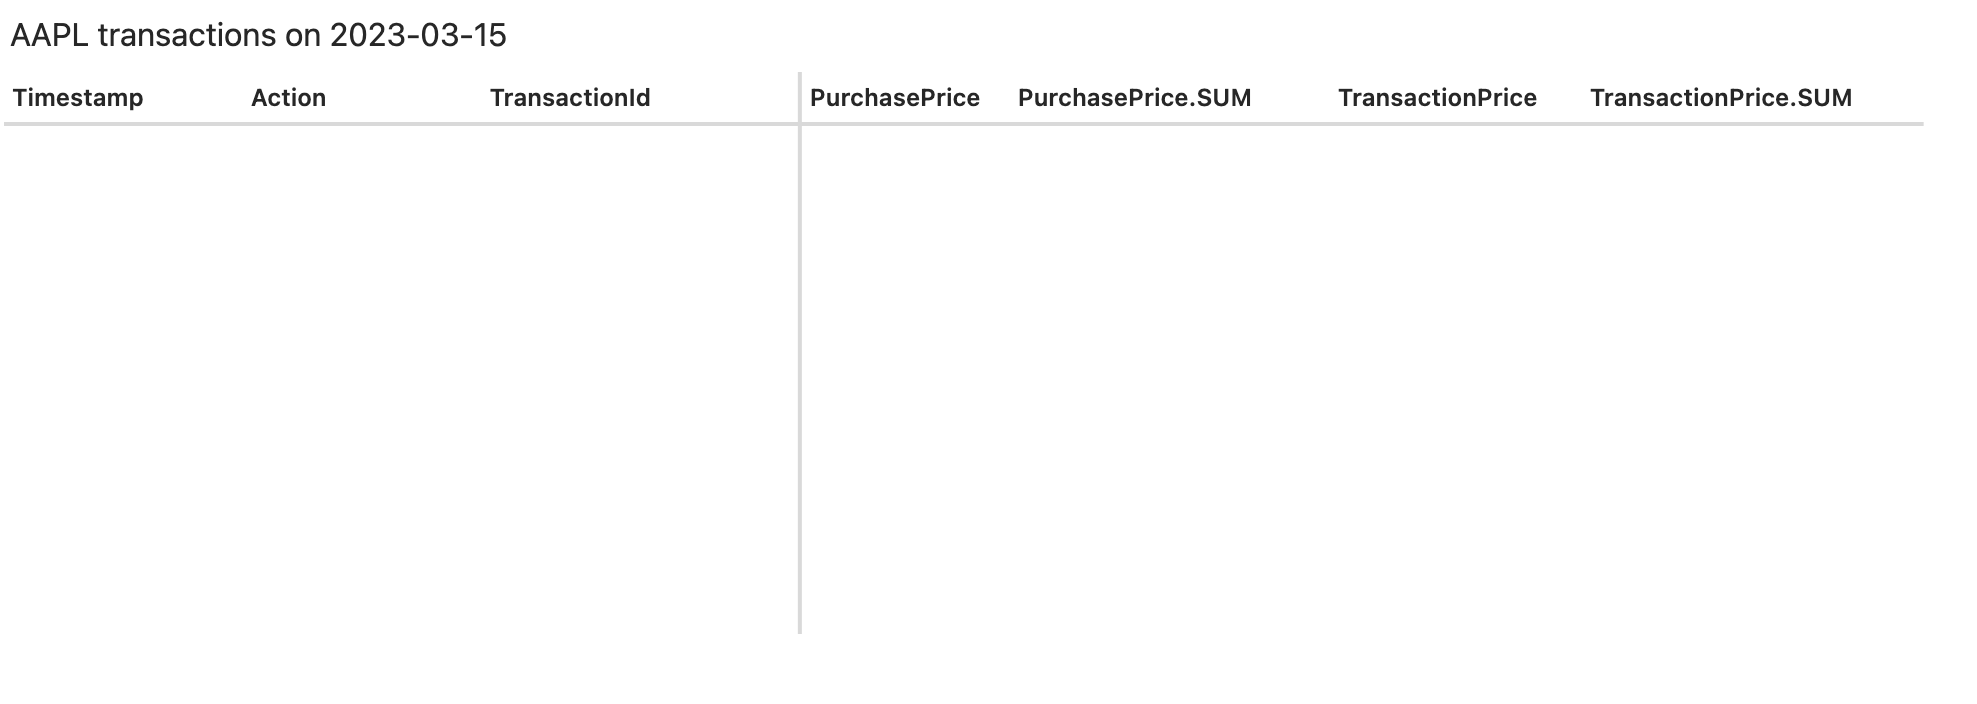

In [10]:
session.widget

#### 2.2.2. Compute realized PnL  

PnL is realized once the ticker is sold. Therefore, we can simply take the difference between the purchase price and transaction price when the transaction action is "Sell". This difference is performed at the `TransactionId` level, hence, we add it in the scope.

In addition, since we have a [conditional check](https://docs.atoti.io/latest/lib/atoti/atoti.function.where.html) on the `Action`, it has to be included in the scope as well.  

In [11]:
m["RealizedPnL"] = tt.agg.sum(
    tt.where(l["Action"] == "Sell", m["TransactionPrice"] - m["PurchasePrice"]),
    scope=tt.OriginScope(l["TransactionId"], l["Action"]),
)

#### 2.2.3. Cumulate realized PnL

We can cumulate the realized PnL along different levels, e.g. Date, DateTime and Timestamp.  
Remember to use the correct measure when querying along the different levels. 

In [12]:
m[f"Cum_Date_RealizedPnL"] = tt.agg.sum(
    m["RealizedPnL"], scope=tt.CumulativeScope(level=l["Date"])
)

m[f"Cum_DateTime_RealizedPnL"] = tt.agg.sum(
    m["RealizedPnL"], scope=tt.CumulativeScope(level=l["DateTime"])
)

m[f"Cum_Timestamp_RealizedPnL"] = tt.agg.sum(
    m["RealizedPnL"], scope=tt.CumulativeScope(level=l["Timestamp"])
)

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
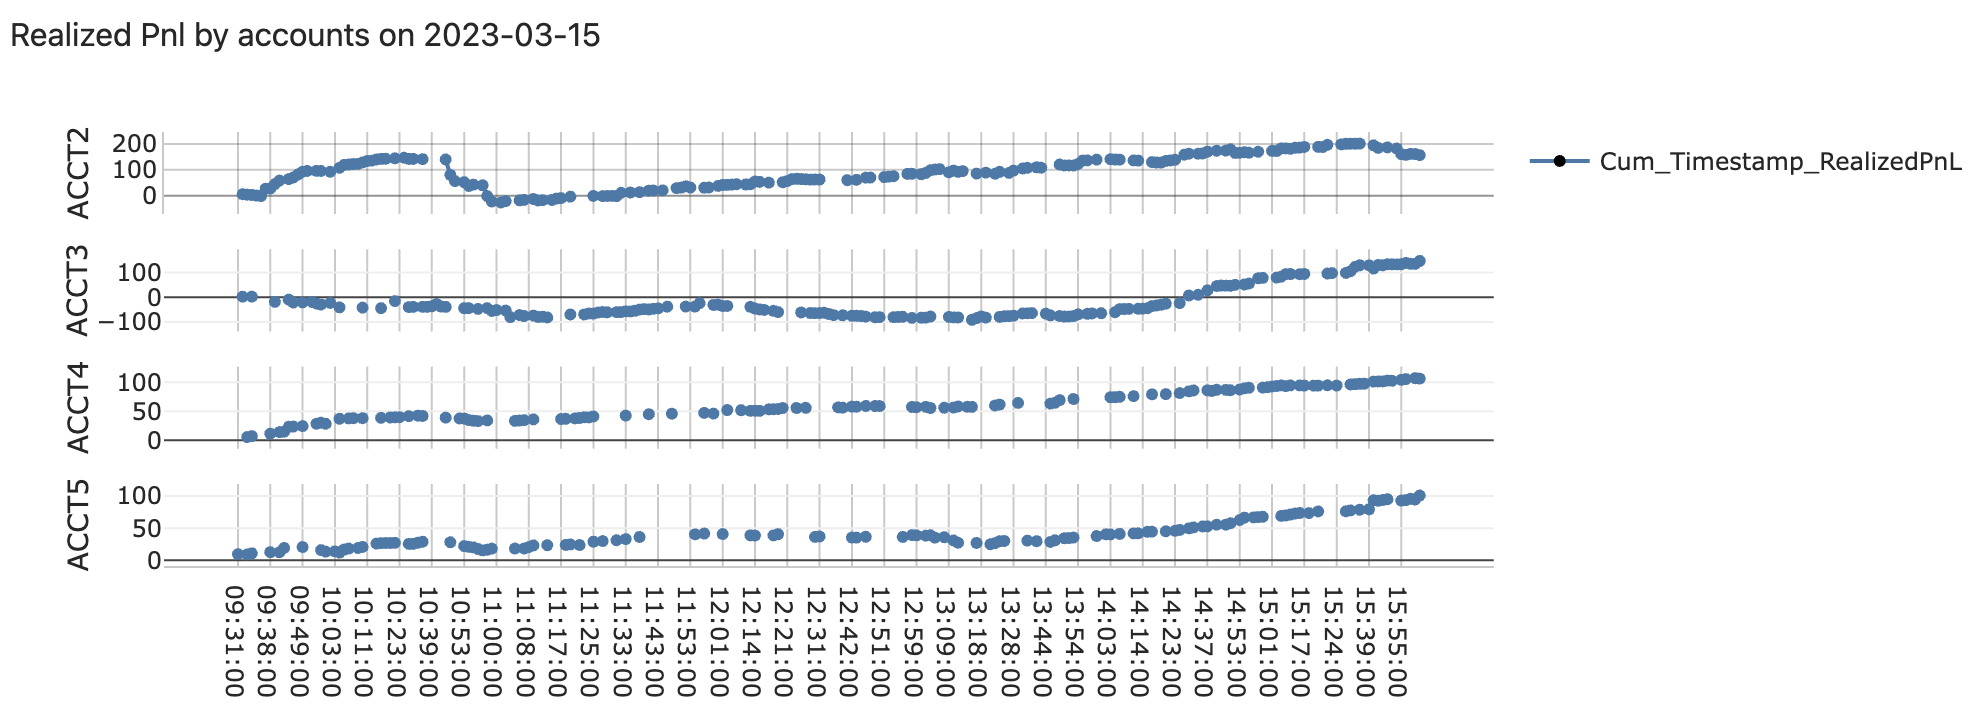

In [13]:
session.widget

Using subplot to visualize the PnL trend for each account, we can clearly see that ACCT3 was making a loss for most part of the day.  
Let's dive a little more into the account to understand the loss better.

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
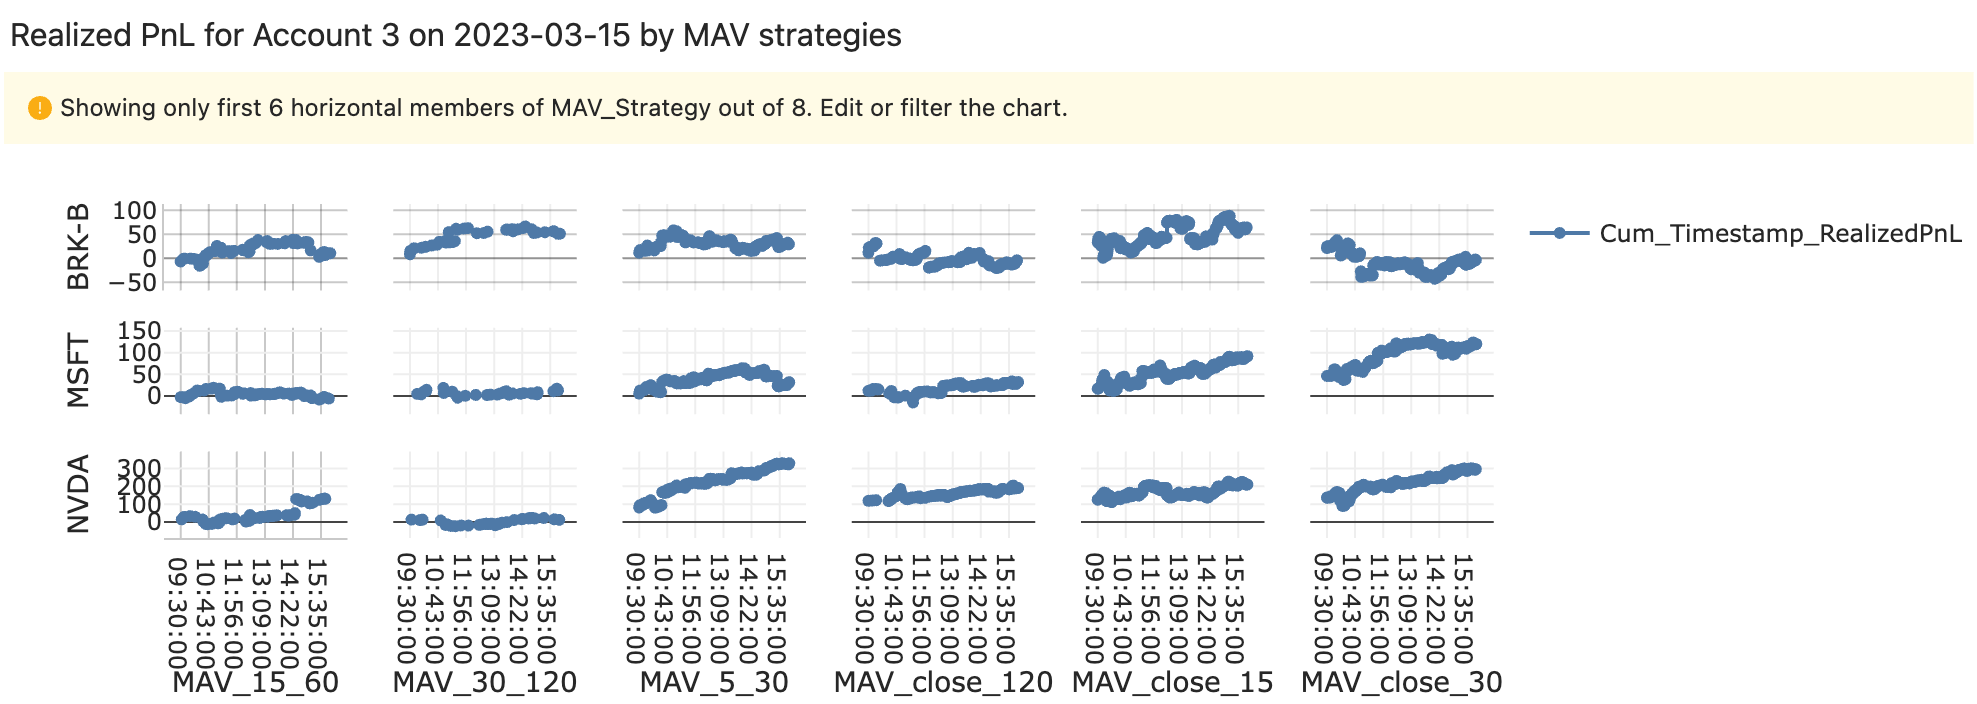

In [14]:
session.widget

We can see that the sales of BRK-B is causing most of the loss.  
Also, the strategy MAV_close_15 and MAV_close_30 are not performing well for NVDA.  

The strategies are simply different ways that the moving average is applied to obtain the buying and selling signals. These data are the outputs from our simplified trading algorithms and you can do the same with your own algorithms.

## 3. Creating buckets

### 3.1. Date bucketing

Out-of-the-box, we are able to create [date buckets](https://docs.atoti.io/latest/lib/atoti/atoti.cube.html#atoti.Cube.create_date_hierarchy) that allow us to visualize data by different buckets such as yearly, quarterly, monthly etc.  
This way, we need not split our date column into the various buckets, saving physical data space.


In [15]:
cube.create_date_hierarchy(
    "Date hierarchy",
    column=txn_tbl["Date"],
    levels={"Year": "yyyy", "Quarter": "QQQ", "Month": "MM", "Day": "dd"},
)

The date buckets allow us to drill down on the period where performance is not ideal and see what are the contributing factors.

ACCT4 has the lowest realized revenue compare to the other accounts. We made a loss in February. Drilling down to the day level, we can see that we made the most loss on 2023-02-13 on AMZN. Similarly, sorting on GOOGL will show that we made the most loss for the stock on 2023-02-15.  

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
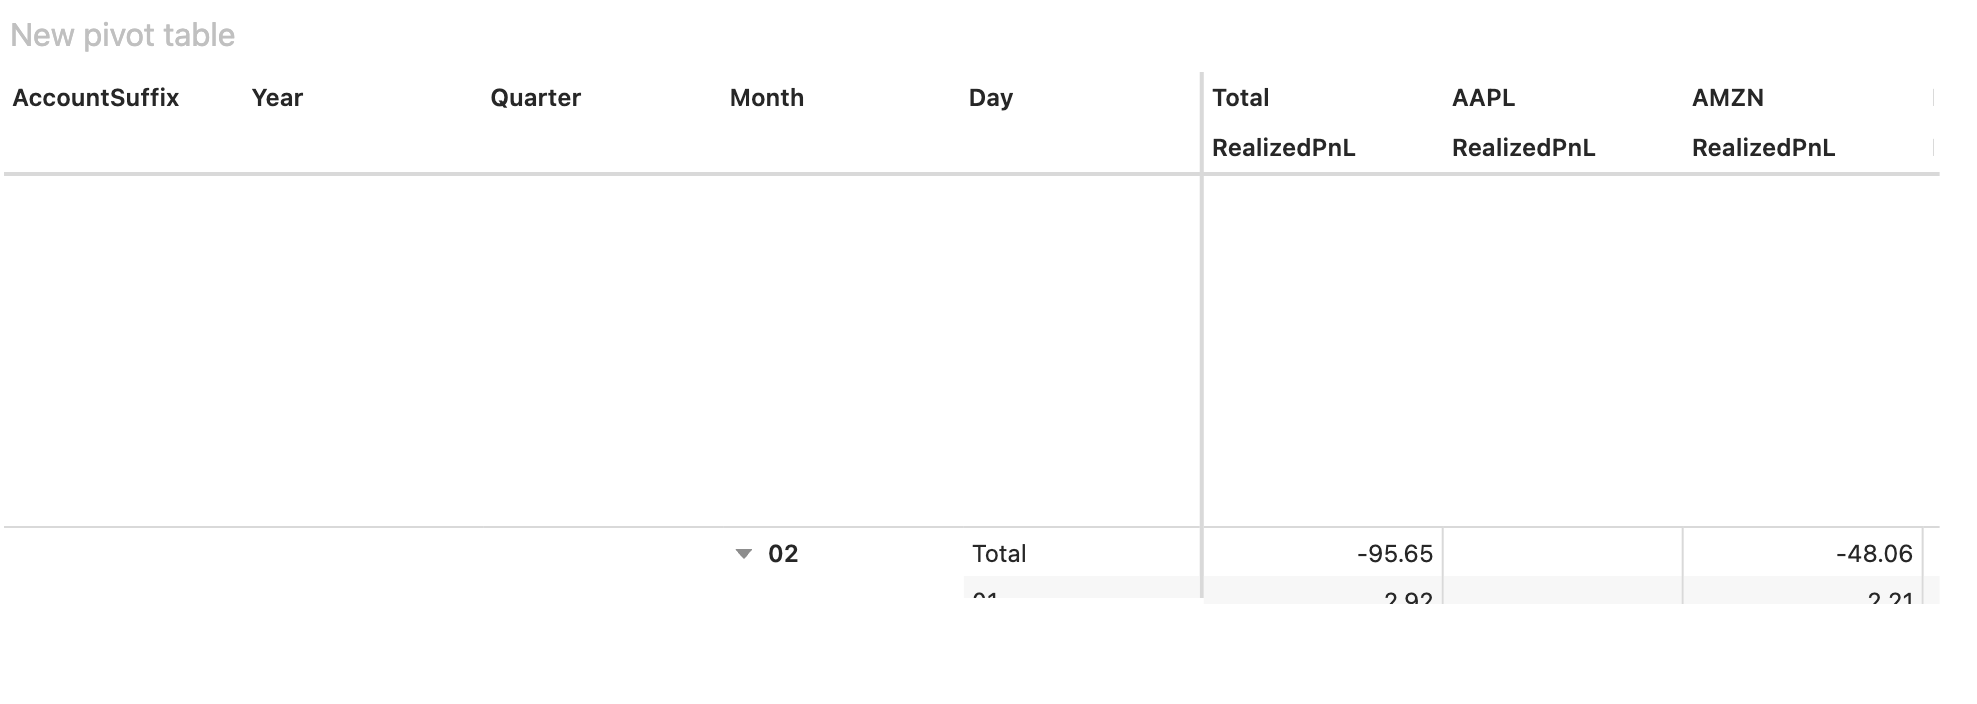

In [16]:
session.widget

### 3.2. Time bucketing

We can enrich the cube with other data sources. Tables can be joined to the base table before or after cube creation.  
This allow us to inject new dimensions to the cube as we draw new insights or inspirations.  

We generated a CSV containing bucket mapping to the trading hours of the stocks, with granularity up to the minutes.  
By joining the time bucket data to the base table, we can now view our data by our predefined buckets.

In [17]:
time_tbl = session.read_csv(
    "s3://data.atoti.io/notebooks/bucket-exploration/time_bucket.csv",
    table_name="TimeBucket",
    keys=["Timestamp"],
    types={
        "Timestamp": tt.type.STRING,
        "Hour": tt.type.STRING,
        "Minute": tt.type.STRING,
        "Second": tt.type.STRING,
    },
)
time_tbl.head()



,Custom_bucket,Hour,Minute,Second
Timestamp,,,,
09:42:00,[09:30-10:00),09,42,00
09:56:00,[09:30-10:00),09,56,00
10:10:00,[10:10-10:30),10,10,00
10:24:00,[10:10-10:30),10,24,00
10:38:00,[10:00-11:00),10,38,00


In [18]:
txn_tbl.join(time_tbl, txn_tbl["Timestamp"] == time_tbl["Timestamp"])
session.tables.schema

```mermaid
erDiagram
  "Transaction" {
    _ String "AccountSuffix"
    _ String PK "Ticker"
    _ String PK "DateTime"
    nullable double "TransactionPrice"
    _ String "MAV_Strategy"
    _ String "Action"
    _ String "Strategy"
    _ String "PurchaseDate"
    nullable double "PurchasePrice"
    _ String "PurchaseTxnId"
    _ String PK "TransactionId"
    _ LocalDate "Date"
    _ String "Timestamp"
  }
  "TimeBucket" {
    _ String PK "Timestamp"
    _ String "Custom_bucket"
    _ String "Hour"
    _ String "Minute"
    _ String "Second"
  }
  "Transaction" }o--o| "TimeBucket" : "`Timestamp` == `Timestamp`"
```


In [19]:
m[f"Cum_Custom_RealizedPnL"] = tt.agg.sum(
    m["RealizedPnL"], scope=tt.CumulativeScope(level=l["Custom_bucket"])
)

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
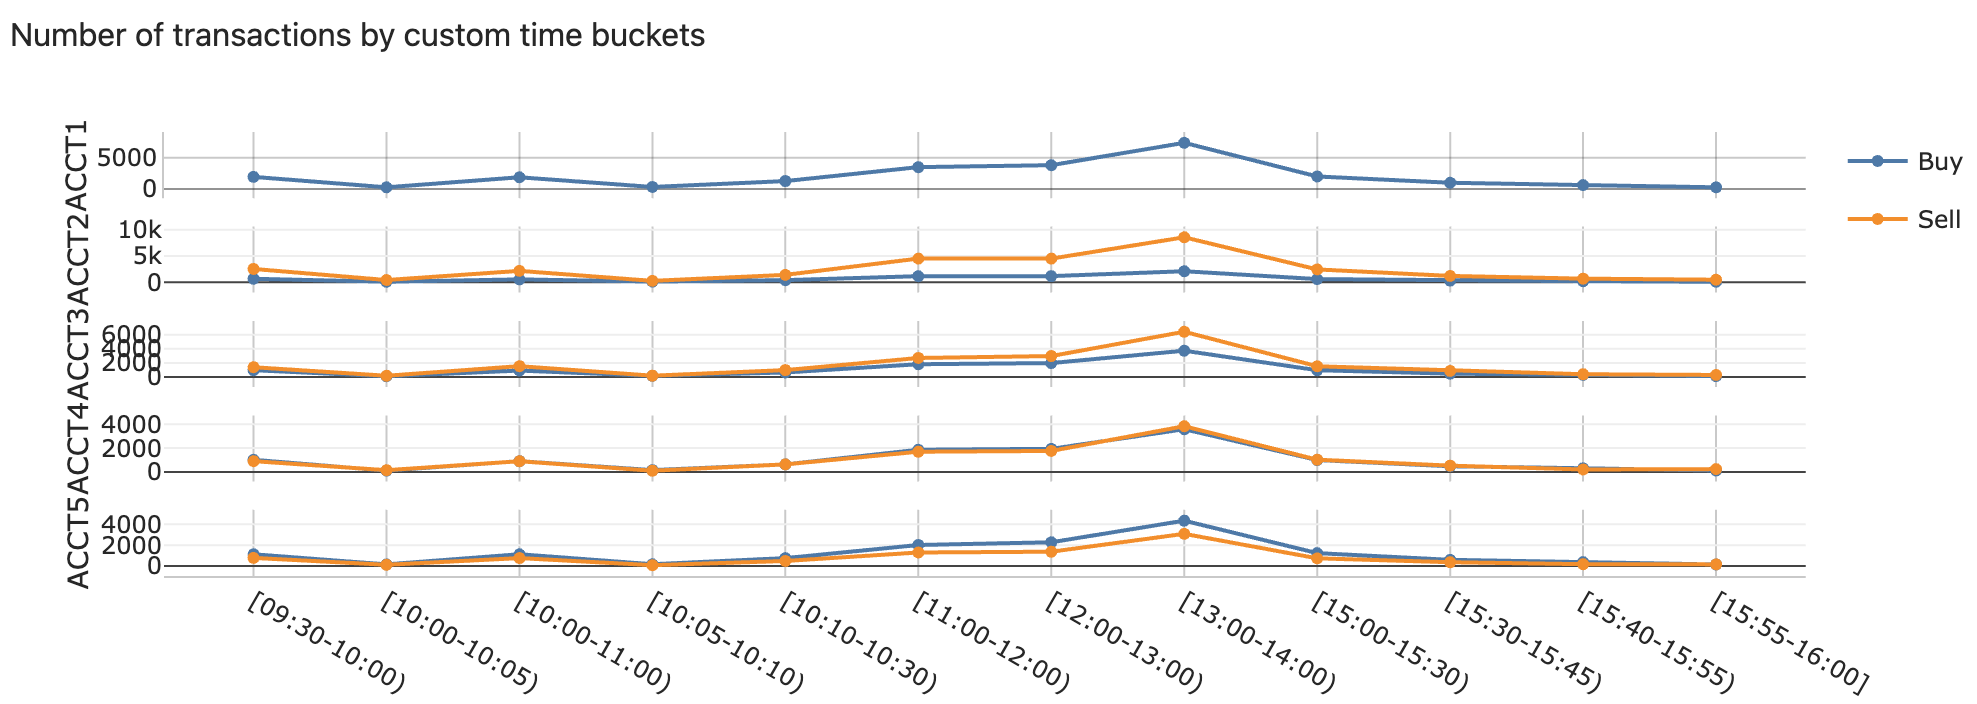

In [20]:
session.widget

In the function below, we enriched our cube with more tables to be able to understand our data from different perspectives.

## 4. Loading additional transactions

Once we have our data model established, we can upload the transactions of different strategies incrementally to the cube without having to restart.  
We can keep our train of thoughts without having to go back to the code base again.  

Below, we demonstrate how we can have interactive data loading in the notebook using [ipywidgets](https://ipywidgets.readthedocs.io/en/stable/).

In [25]:
from ipywidgets import FileUpload, Output, FloatProgress
from IPython.display import display
import pandas as pd
import io

In [26]:
out = Output()
fp = FloatProgress(min=0, max=2)

In [27]:
@out.capture()
def on_upload_change(change):
    out.clear_output()
    display(fp)
    print("Uploading file for", change["new"][0].name)

    fp.value = 0
    print("- Reading file")
    input_file = list(change["new"])[0]
    content = input_file["content"]
    df = pd.read_csv(io.BytesIO(content))

    # Atoti inherits the data type from Pandas DataFrame.
    # Hence, we cast the data type before loading into the table.
    df[["DateTime", "PurchaseDate", "Timestamp"]] = df[
        ["DateTime", "PurchaseDate", "Timestamp"]
    ].astype(str)
    df["Date"] = pd.to_datetime(df["Date"]).dt.date

    print("data type of file loaded:")
    print(df.dtypes)

    fp.value = 1

    print("-- loading into transaction table")
    data_model.load_transactions(session, df)
    fp.value = 2

    displayFileLoader()

In [28]:
def displayFileLoader():
    uploader = widgets.FileUpload(
        accept=".csv",
        multiple=False,
    )

    uploader.observe(on_upload_change, "value")
    with out:
        display(uploader)

We will be able to load new transaction data for the cube as long as it follows the same columns and their data types.  
Download this [sample transaction file](https://data.atoti.io/notebooks/bucket-exploration/transactions_c.csv) and try loading it with the below function.

In [29]:
displayFileLoader()
out

Output()

We are now able to access the latest data!  

If you are loading the [sample transaction file](https://data.atoti.io/notebooks/bucket-exploration/transactions_c.csv) provided, switch the below cell to code and run it to see the difference between the two strategy.

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
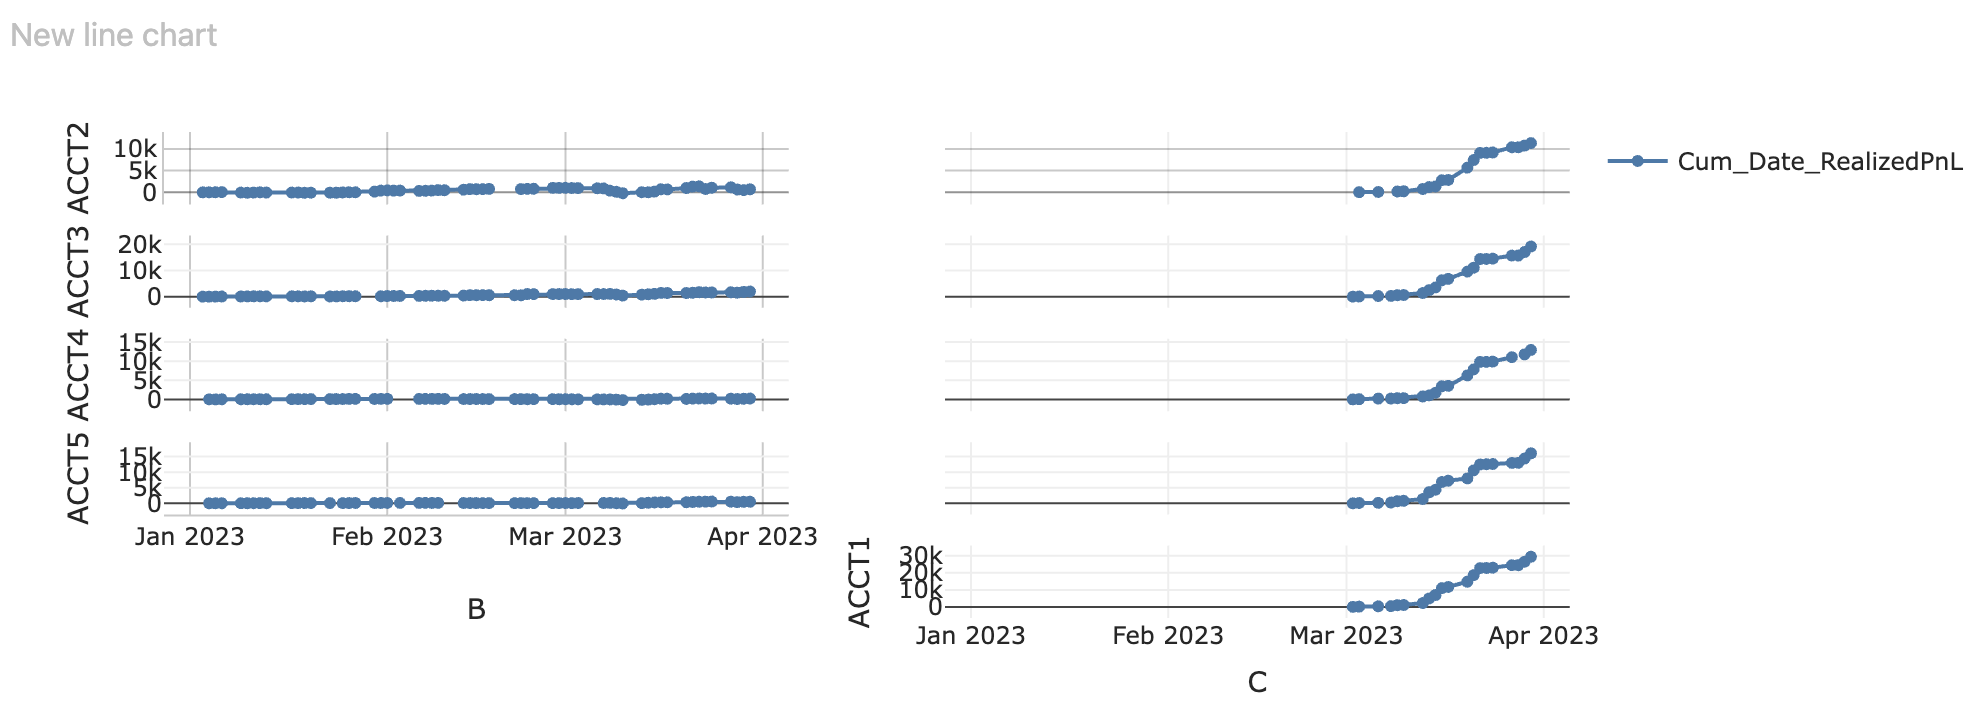

In [32]:
session.widget

## 5. Interactive exploration

Access the below dashboard to see how we can permutate across different dimensions to gather different insights. Play with the filters to dive in a particular account, sector or strategy!

In [34]:
session.link / "#/dashboard/11d"

http://localhost:9092/#/dashboard/11d

_Note_: This is the session's local URL: it may not be reachable if Atoti is running on another machine.

<div style="text-align: center;" ><a href="https://www.atoti.io/?utm_source=gallery&utm_content=buckets" target="_blank" rel="noopener noreferrer"><img src="https://data.atoti.io/notebooks/banners/Your-turn-to-try-Atoti.jpg" alt="Try atoti"></a></div>